<a href="https://colab.research.google.com/github/karielson/PPGEP9002_INTELIGENCIA_COMPUTACIONAL/blob/main/DBSCAN_vs_K_means_Clustering_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Executar esta célula primeiro para instalar todas as bibliotecas necessárias
!pip install numpy pandas scikit-learn matplotlib seaborn

# Verificar as versões instaladas
import numpy as np
import pandas as pd
from sklearn import __version__ as sk_version
import matplotlib as mpl
import seaborn as sns

print("Versões das bibliotecas instaladas:")
print(f"NumPy: {np.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"Scikit-learn: {sk_version}")
print(f"Matplotlib: {mpl.__version__}")
print(f"Seaborn: {sns.__version__}")

Versões das bibliotecas instaladas:
NumPy: 1.26.4
Pandas: 2.2.2
Scikit-learn: 1.5.2
Matplotlib: 3.8.0
Seaborn: 0.13.2


Iniciando análise de clustering...

=== Análise do Wine Dataset ===

Informações do Dataset:
Número de amostras: 178
Número de características: 13

Eps ótimo encontrado: 2.524

Resultados DBSCAN:
Número de clusters: 3
Pontos de ruído: 18
Silhouette Score: -0.020

Resultados K-means:
Número de clusters: 3
Silhouette Score: 0.285


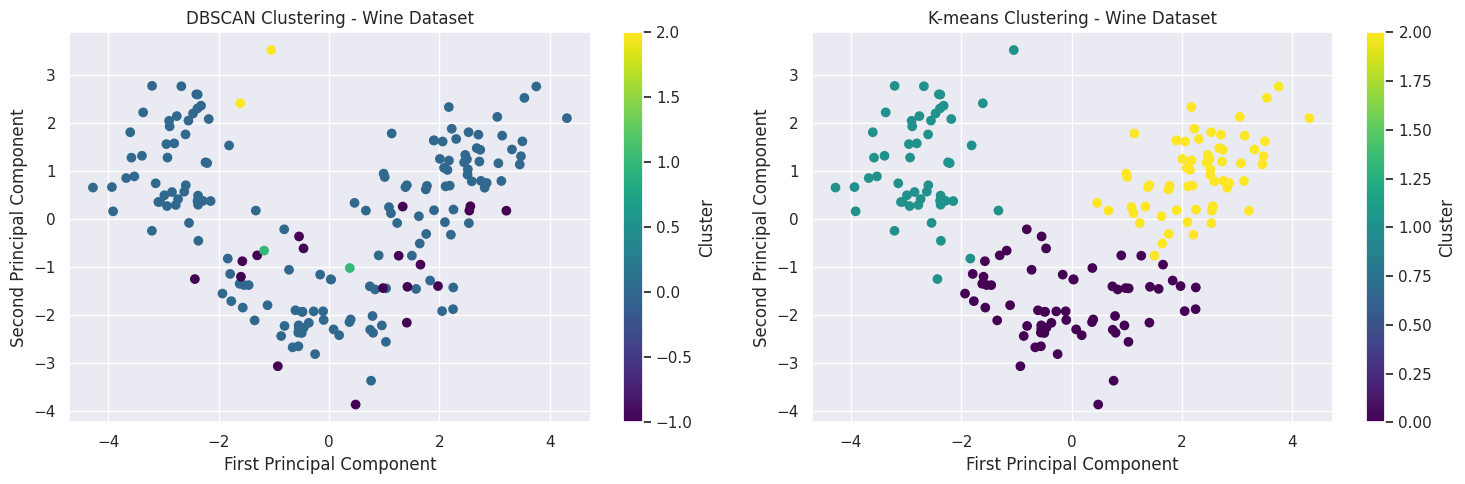


=== Análise do 20 Newsgroups Dataset ===

Carregando e processando dados textuais...

Informações do Dataset:
Número de documentos: 1000
Número de características: 1000

Aplicando DBSCAN...
Aplicando K-means...

Resultados DBSCAN:
Número de clusters: 3
Pontos de ruído: 994
Silhouette Score: -0.002

Resultados K-means:
Número de clusters: 20
Silhouette Score: 0.014

Gerando visualizações...


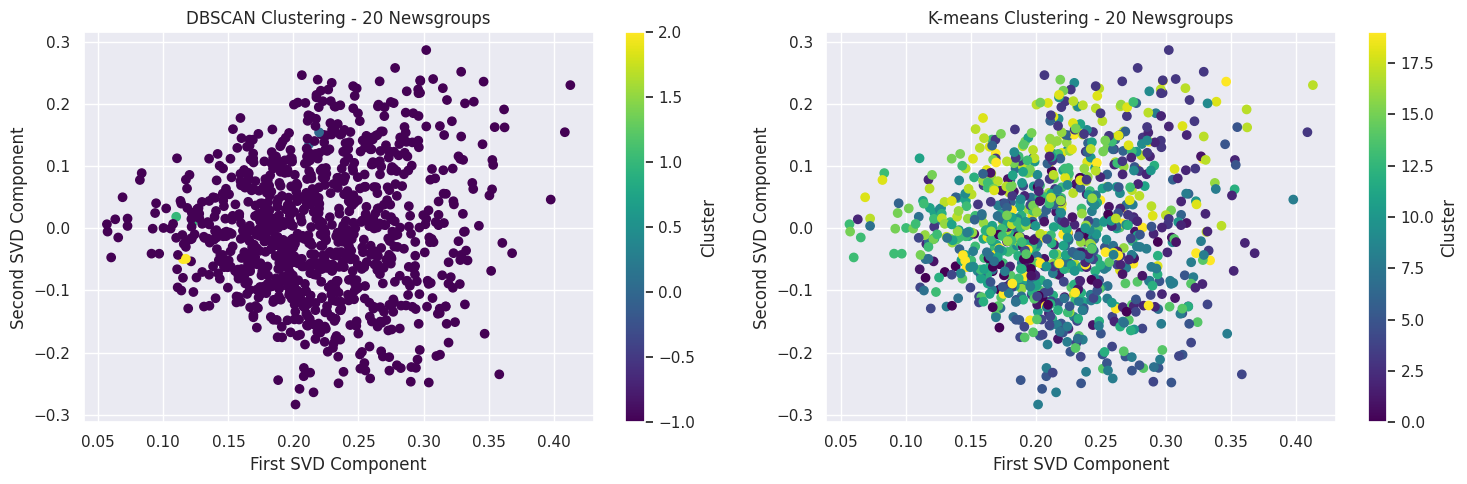


=== Comparação Final dos Resultados ===

Wine Dataset:
   dbscan_n_clusters  dbscan_noise  kmeans_silhouette  dbscan_silhouette
0                  3            18           0.284859          -0.020147

20 Newsgroups Dataset:
   dbscan_n_clusters  dbscan_noise  kmeans_silhouette  dbscan_silhouette
0                  3           994           0.014244          -0.002169


In [ ]:
# Importar bibliotecas
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine, fetch_20newsgroups
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.neighbors import NearestNeighbors
import seaborn as sns

# Configuração básica do plot
plt.style.use('default')
sns.set_theme()




def find_optimal_eps(X, k=5):
    """
    Encontra um valor eps apropriado usando o método do cotovelo
    """
    neigh = NearestNeighbors(n_neighbors=k)
    nbrs = neigh.fit(X)
    distances, indices = nbrs.kneighbors(X)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]  # Pegar a distância do k-ésimo vizinho
    return np.percentile(distances, 90)  # Usar o 90º percentil como eps

def analyze_wine_dataset():
    print("\n=== Análise do Wine Dataset ===")

    # Carregar e preparar Wine dataset
    wine = load_wine()
    X = StandardScaler().fit_transform(wine.data)

    print("\nInformações do Dataset:")
    print(f"Número de amostras: {X.shape[0]}")
    print(f"Número de características: {X.shape[1]}")

    # Encontrar eps ideal
    eps_optimal = find_optimal_eps(X)
    print(f"\nEps ótimo encontrado: {eps_optimal:.3f}")

    # Aplicar DBSCAN com parâmetros otimizados
    dbscan = DBSCAN(eps=eps_optimal, min_samples=2)
    dbscan_labels = dbscan.fit_predict(X)

    # Aplicar K-means
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans_labels = kmeans.fit_predict(X)

    # Calcular métricas
    dbscan_n_clusters = len(np.unique(dbscan_labels[dbscan_labels >= 0]))
    dbscan_noise = np.sum(dbscan_labels == -1)
    kmeans_silhouette = silhouette_score(X, kmeans_labels)
    dbscan_silhouette = silhouette_score(X, dbscan_labels) if len(np.unique(dbscan_labels)) > 1 else 0

    print("\nResultados DBSCAN:")
    print(f"Número de clusters: {dbscan_n_clusters}")
    print(f"Pontos de ruído: {dbscan_noise}")
    print(f"Silhouette Score: {dbscan_silhouette:.3f}")

    print("\nResultados K-means:")
    print(f"Número de clusters: 3")
    print(f"Silhouette Score: {kmeans_silhouette:.3f}")

    # Visualização
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.figure(figsize=(15, 5))

    # Plot DBSCAN
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis')
    plt.title('DBSCAN Clustering - Wine Dataset')
    plt.colorbar(scatter, label='Cluster')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')

    # Plot K-means
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
    plt.title('K-means Clustering - Wine Dataset')
    plt.colorbar(scatter, label='Cluster')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')

    plt.tight_layout()
    plt.show()

    return {
        'dbscan_n_clusters': dbscan_n_clusters,
        'dbscan_noise': dbscan_noise,
        'kmeans_silhouette': kmeans_silhouette,
        'dbscan_silhouette': dbscan_silhouette
    }

def analyze_news_dataset():
    print("\n=== Análise do 20 Newsgroups Dataset ===")

    # Carregar e preparar 20 Newsgroups dataset
    newsgroups = fetch_20newsgroups(subset='test', random_state=42)
    print("\nCarregando e processando dados textuais...")
    vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
    X = vectorizer.fit_transform(newsgroups.data[:1000])
    X_dense = X.toarray()

    print("\nInformações do Dataset:")
    print(f"Número de documentos: {X_dense.shape[0]}")
    print(f"Número de características: {X_dense.shape[1]}")

    # Encontrar eps ideal para dados textuais
    eps_optimal = 0.1  # Valor fixo para dados textuais com similaridade do cosseno

    # Aplicar DBSCAN com parâmetros otimizados
    print("\nAplicando DBSCAN...")
    dbscan = DBSCAN(eps=eps_optimal, min_samples=2, metric='cosine')
    dbscan_labels = dbscan.fit_predict(X)

    # Aplicar K-means
    print("Aplicando K-means...")
    kmeans = KMeans(n_clusters=20, random_state=42)
    kmeans_labels = kmeans.fit_predict(X.toarray())

    # Calcular métricas
    dbscan_n_clusters = len(np.unique(dbscan_labels[dbscan_labels >= 0]))
    dbscan_noise = np.sum(dbscan_labels == -1)
    kmeans_silhouette = silhouette_score(X.toarray(), kmeans_labels)
    dbscan_silhouette = silhouette_score(X.toarray(), dbscan_labels) if len(np.unique(dbscan_labels)) > 1 else 0

    print("\nResultados DBSCAN:")
    print(f"Número de clusters: {dbscan_n_clusters}")
    print(f"Pontos de ruído: {dbscan_noise}")
    print(f"Silhouette Score: {dbscan_silhouette:.3f}")

    print("\nResultados K-means:")
    print(f"Número de clusters: 20")
    print(f"Silhouette Score: {kmeans_silhouette:.3f}")

    # Visualização
    print("\nGerando visualizações...")
    svd = TruncatedSVD(n_components=2)
    X_svd = svd.fit_transform(X)

    plt.figure(figsize=(15, 5))

    # Plot DBSCAN
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(X_svd[:, 0], X_svd[:, 1], c=dbscan_labels, cmap='viridis')
    plt.title('DBSCAN Clustering - 20 Newsgroups')
    plt.colorbar(scatter, label='Cluster')
    plt.xlabel('First SVD Component')
    plt.ylabel('Second SVD Component')

    # Plot K-means
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(X_svd[:, 0], X_svd[:, 1], c=kmeans_labels, cmap='viridis')
    plt.title('K-means Clustering - 20 Newsgroups')
    plt.colorbar(scatter, label='Cluster')
    plt.xlabel('First SVD Component')
    plt.ylabel('Second SVD Component')

    plt.tight_layout()
    plt.show()

    return {
        'dbscan_n_clusters': dbscan_n_clusters,
        'dbscan_noise': dbscan_noise,
        'kmeans_silhouette': kmeans_silhouette,
        'dbscan_silhouette': dbscan_silhouette
    }

# Executar as análises
print("Iniciando análise de clustering...")
wine_results = analyze_wine_dataset()
news_results = analyze_news_dataset()

# Mostrar comparação final
print("\n=== Comparação Final dos Resultados ===")
print("\nWine Dataset:")
print(pd.DataFrame([wine_results]).to_string())
print("\n20 Newsgroups Dataset:")
print(pd.DataFrame([news_results]).to_string())